In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [7]:
data  = datasets.load_iris()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
scalar = MinMaxScaler()

scalar.fit(df)
scaled = scalar.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=data.feature_names)
scaled_df['target'] = data.target   
target_dict = dict(zip([0, 1, 2], data.target_names))

scaled_df['target_name'] = scaled_df['target'].map(target_dict)
display(scaled_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,virginica
146,0.555556,0.208333,0.677966,0.750000,2,virginica
147,0.611111,0.416667,0.711864,0.791667,2,virginica
148,0.527778,0.583333,0.745763,0.916667,2,virginica


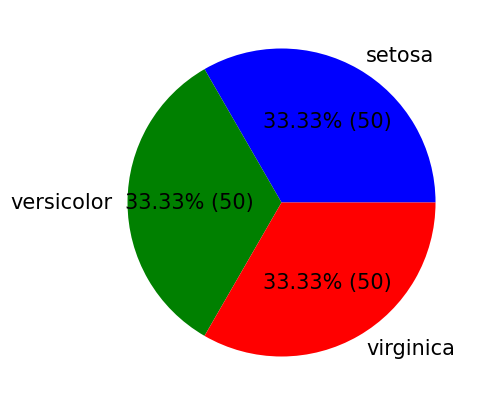

In [10]:
plt.figure(figsize=(10,5))
plt.pie(scaled_df['target'].value_counts(), labels=data.target_names, textprops={'fontsize': 15}, colors = ['blue', 'green', 'red'], autopct= lambda x: '{:.2f}% ({:.0f})'.format(x, x * len(scaled_df) / 100))

plt.show()


In [11]:
means = scaled_df.groupby(['target']).mean(numeric_only=True)
display(means)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,0.196111,0.595000,0.078305,0.060833
1,0.454444,0.320833,0.552542,0.510833
2,0.635556,0.405833,0.771525,0.802500


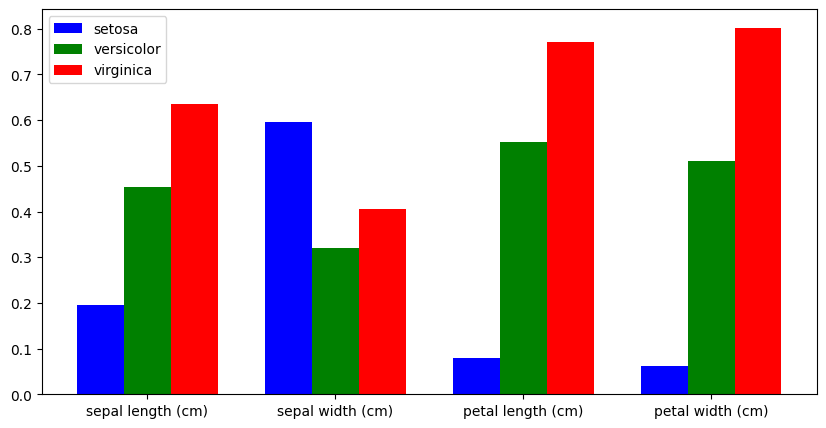

In [12]:
features = means.columns

x_axis = np.array([1,2,3,4])
y_axis = means.values

plt.figure(figsize=(10,5))
plt.bar(x_axis-.25, y_axis[0], width=0.25, color='blue')
plt.bar(x_axis, y_axis[1], width=0.25, color='green')
plt.bar(x_axis+.25, y_axis[2], width=0.25, color='red')

plt.xticks(x_axis, features)
plt.legend(data.target_names)
plt.show()

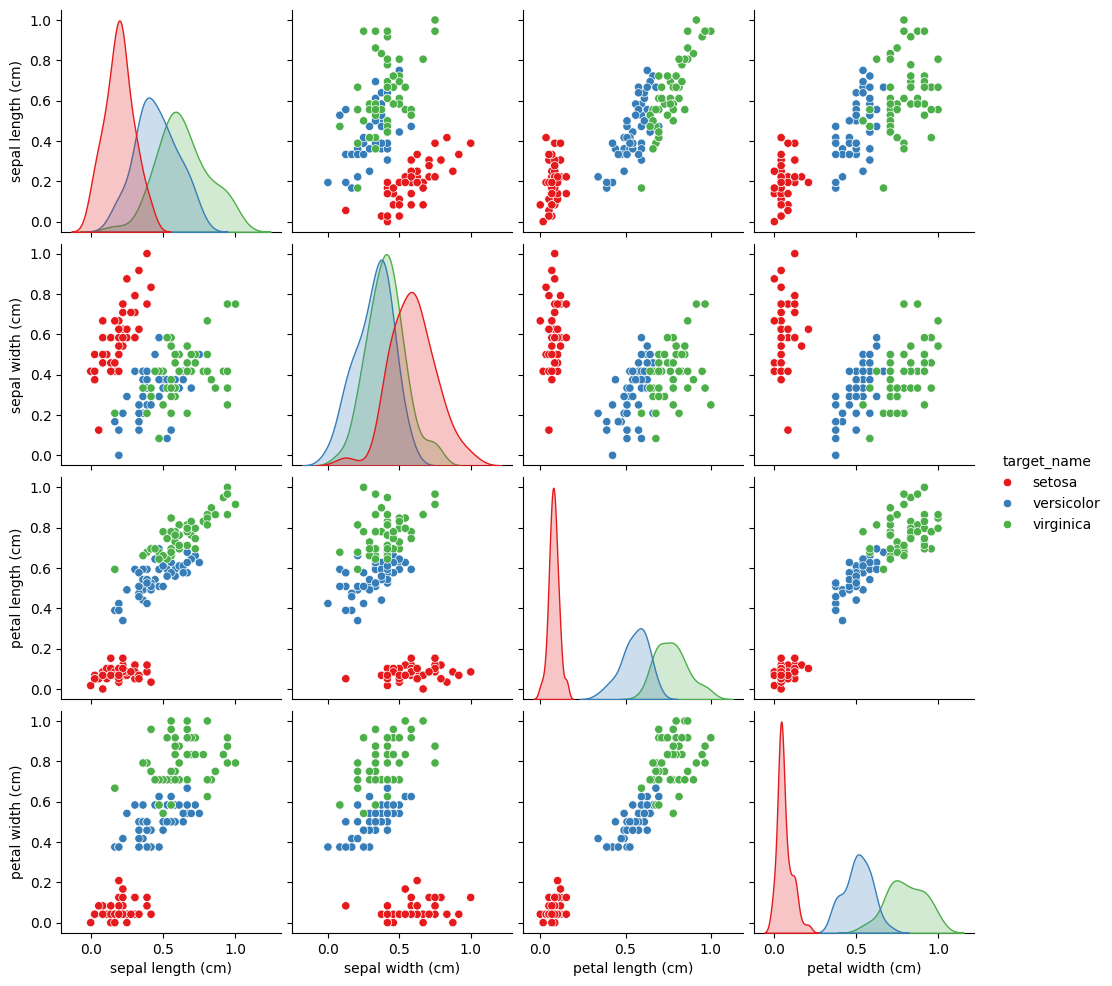

In [13]:
sns.pairplot(scaled_df[scaled_df.columns[[0,1,2,3,5]]], hue='target_name', palette='Set1')
plt.show()

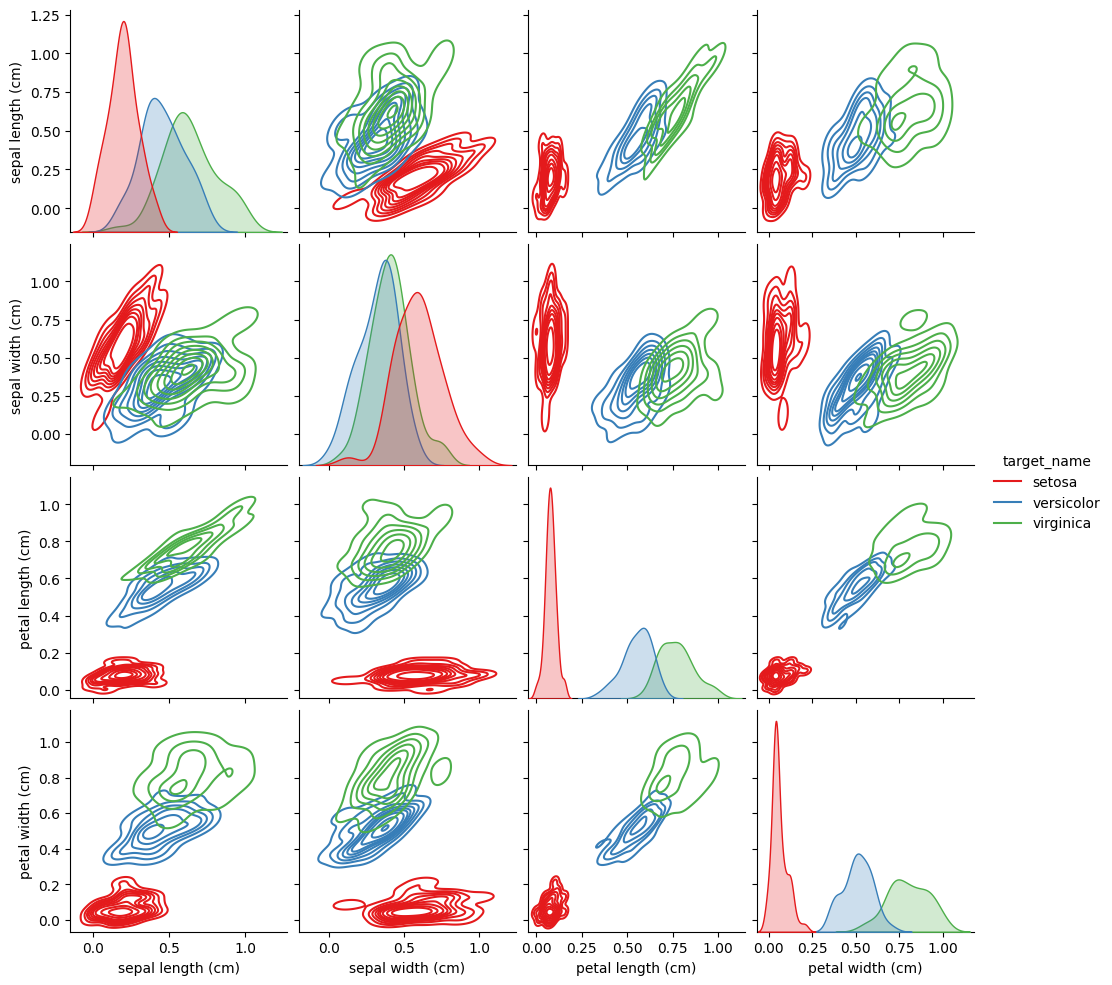

In [14]:
sns.pairplot(scaled_df[scaled_df.columns[[0,1,2,3,5]]], hue='target_name', palette='Set1', kind='kde')
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [16]:
X = scaled_df.values[:, :4].astype(np.float32)
y = scaled_df.values[:, 4].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train).score(X_test, y_test)

(120, 4) (30, 4) (120,) (30,)


0.9666666666666667

In [17]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(5, 91, 5),
    'min_samples_split': np.arange(2,10),
    'max_features': ['sqrt', 'log2', None], 
}

In [18]:
rand_search = RandomizedSearchCV(clf, param_distributions=params, cv=5, n_jobs=-1, random_state=42, scoring='accuracy')
rand_search.fit(X_train, y_train)

random_params = rand_search.best_params_
print(random_params, '\n')

print('Train_Accuracy: ', rand_search.best_score_)

preds = rand_search.predict(X_test)

print('Test_Accuracy: ', accuracy_score(preds, y_test))

{'splitter': 'random', 'min_samples_split': np.int64(6), 'max_features': 'log2', 'max_depth': np.int64(15), 'criterion': 'gini'} 

Train_Accuracy:  0.95
Test_Accuracy:  0.9666666666666667


In [19]:
max_depth = np.arange(random_params['max_depth']-3, random_params['max_depth']+3)
min_samples_split = np.arange(random_params['min_samples_split']-3, random_params['min_samples_split']+3)

params = {
    'criterion': [random_params['criterion']],
    'splitter': [random_params['splitter']],
    'max_depth': max_depth[max_depth >= 2],
    'min_samples_split': min_samples_split[min_samples_split >= 2],
    'max_features': [random_params['max_features']], 
}

grid_search = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')

print('Train_Accuracy: ', grid_search.best_score_)

preds = grid_search.predict(X_test)

print('Test_Accuracy: ', accuracy_score(preds, y_test))

{'criterion': 'gini', 'max_depth': np.int64(12), 'max_features': 'log2', 'min_samples_split': np.int64(4), 'splitter': 'random'} 

Train_Accuracy:  0.9666666666666668
Test_Accuracy:  0.9666666666666667


In [20]:
print(classification_report(preds, y_test, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train).score(X_test, y_test)


0.9666666666666667

In [23]:
params = {
    'n_neighbors': np.arange(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'leaf_size': np.linspace(10, 150, 15).astype(int),
}

rand_search = RandomizedSearchCV(clf, param_distributions=params, cv=5, n_jobs=-1, random_state=1, scoring='accuracy')

rand_search.fit(X_train, y_train)

random_params = rand_search.best_params_
print(random_params, '\n')

print('Train_Accuracy: ', rand_search.best_score_)

preds = rand_search.predict(X_test)

print('Test_Accuracy: ', accuracy_score(preds, y_test))

{'weights': 'distance', 'n_neighbors': np.int64(6), 'metric': 'chebyshev', 'leaf_size': np.int64(110), 'algorithm': 'ball_tree'} 

Train_Accuracy:  0.9583333333333334
Test_Accuracy:  1.0


In [24]:
n_neighbors = np.arange(random_params['n_neighbors']-3, random_params['n_neighbors']+3)
leaf_size = np.arange(random_params['leaf_size']-3, random_params['leaf_size']+3)

params = {
    'n_neighbors': n_neighbors,
    'weights': [random_params['weights']],
    'algorithm': [random_params['algorithm']],
    'metric': [random_params['metric']],
    'leaf_size': leaf_size,
}

grid_search = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')

print('Train_Accuracy: ', grid_search.best_score_)

preds = grid_search.predict(X_test)

print('Test_Accuracy: ', accuracy_score(preds, y_test))

{'algorithm': 'ball_tree', 'leaf_size': np.int64(107), 'metric': 'chebyshev', 'n_neighbors': np.int64(3), 'weights': 'distance'} 

Train_Accuracy:  0.9583333333333334
Test_Accuracy:  1.0


In [25]:
print(classification_report(preds, y_test, target_names=data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

